In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90.000,90.000,size=1500)
lngs = np.random.uniform(-180.000,180.000,size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list
coordinates = list(lat_lngs)

In [4]:
for coordinate in coordinates:
    print(coordinate[0],coordinate[1])

26.094045740133822 122.0908093958904
45.13297641353245 -16.33063521765783
-35.88914918868617 97.11337518889627
-31.990460025316843 -36.395039954236665
-36.04864980878589 23.338481657084998
53.59509565673679 0.03832708824646147
13.620569875127785 -78.7087801143759
-29.345295252679286 -124.64596340946967
-28.620714093831793 88.03145575921656
26.806973701906557 98.19549863953296
-26.129039498897328 171.61468437159698
-67.38506701830939 -136.64247693995742
14.374686814719666 -8.030772429534068
-62.282037438901625 -26.866506629212125
27.813071010413566 23.52763120488646
25.255513570704125 65.82668435549945
82.07087544438178 131.11276270546006
-65.7475665760743 82.27865638468654
-33.32847198714638 166.54274666745687
81.7732025330765 14.825084238378963
50.97227158575794 146.96001151551945
-53.56498862536452 -28.759732383206995
-6.207426302853747 5.2131378864254145
-57.33582925663581 107.65527995633641
-59.266437261540375 68.70543886885125
32.39506909479566 168.18324829926144
-1.94569306344932

In [5]:
from citipy import citipy

In [6]:
cities = []

# Identify nearest cities for lats and longs
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0],coordinate[1]).city_name

    # Add each unique city to list
    if city not in cities:
        cities.append(city)

len(cities)

621

In [7]:
import requests
from config import weather_api_key
import time
from datetime import datetime

In [8]:
city_data = []

# initialize URL w/ API key for OpenWeatherMap
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(
    "Beginning Data Retrieval\n",
    "-----------------------------"
)

# create counters
record_count = 1
set_count = 1

# loop through all cities in list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if i % 50 == 0 and i >= 50:
        set_count += 1
        record_count = 1
        time.sleep(60) # Only allowed 60 API calls/minute; sleep to prevent time-out errors.

    # Create endpoint URL for each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers for each city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    record_count += 1

    try:
        # Parse the JSON and retrieve data.
        weather = requests.get(city_url).json()
        lat = weather["coord"]["lat"]
        lng = weather["coord"]["lon"]
        max_temp = weather["main"]["temp_max"]
        humidity = weather["main"]["humidity"]
        clouds = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country = weather["sys"]["country"]

        # Convert the date to ISO standard.
        date = datetime.utcfromtimestamp(weather["dt"]).strftime('%Y-%m-%d %H:%M:S')

        # Append city info to city_data list.
        city_data.append({"City" : city.title(),
                          "Lat" : lat,
                          "Lng" : lng,
                          "Max Temp" : max_temp,
                          "Humidity" : humidity,
                          "Clouds" : clouds,
                          "Wind" : wind,
                          "Country" : country,
                          "Date" : date})
    except:
        print(f"{city} not found. Skipping...")
        continue

# Indicate that data loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
 -----------------------------
Processing Record 1 of Set 1 | juifang
juifang not found. Skipping...
Processing Record 2 of Set 1 | muros
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | plettenberg bay
Processing Record 6 of Set 1 | cleethorpes
Processing Record 7 of Set 1 | san andres
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | carnarvon
Processing Record 10 of Set 1 | myitkyina
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | kolokani
Processing Record 13 of Set 1 | chuy
Processing Record 14 of Set 1 | jalu
Processing Record 15 of Set 1 | uthal
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | ahipara
Processing Record 18 of Set 1 | longyearbyen
Processing Record 19 of Set 1 | vostok
Processing Record 20 of Set 1 | gamba
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | saint-philippe
Processing Record 23

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind,Country,Date
0,Muros,42.7762,-9.0603,68.09,83,77,15.70,ES,2022-07-21 23:25:S
1,Busselton,-33.6500,115.3333,58.48,79,71,9.19,AU,2022-07-21 23:25:S
2,Arraial Do Cabo,-22.9661,-42.0278,66.16,88,0,4.61,BR,2022-07-21 23:25:S
3,Plettenberg Bay,-34.0527,23.3716,54.95,70,69,3.98,ZA,2022-07-21 23:25:S
4,Cleethorpes,53.5605,-0.0323,61.45,82,75,10.36,GB,2022-07-21 23:25:S
5,San Andres,12.5847,-81.7006,78.82,94,75,10.36,CO,2022-07-21 23:25:S
6,Rikitea,-23.1203,-134.9692,74.10,80,94,23.02,PF,2022-07-21 23:25:S
7,Carnarvon,-24.8667,113.6333,60.28,76,43,16.31,AU,2022-07-21 23:25:S
8,Myitkyina,25.3833,97.4000,74.71,96,90,1.88,MM,2022-07-21 23:21:S
9,Vao,-22.6667,167.4833,73.63,90,46,19.51,NC,2022-07-21 23:25:S


In [10]:
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Clouds", "Wind"]]
city_data_df.rename(columns={"Clouds":"Cloudiness", "Wind":"Wind Speed"}, inplace=True)
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Muros,ES,2022-07-21 23:25:S,42.7762,-9.0603,68.09,83,77,15.70
1,Busselton,AU,2022-07-21 23:25:S,-33.6500,115.3333,58.48,79,71,9.19
2,Arraial Do Cabo,BR,2022-07-21 23:25:S,-22.9661,-42.0278,66.16,88,0,4.61
3,Plettenberg Bay,ZA,2022-07-21 23:25:S,-34.0527,23.3716,54.95,70,69,3.98
4,Cleethorpes,GB,2022-07-21 23:25:S,53.5605,-0.0323,61.45,82,75,10.36


In [11]:
city_data_df.to_csv("./Weather-Data/cities.csv", index_label="City_ID")

In [12]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidities = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speeds = city_data_df["Wind Speed"]

In [13]:
import time
# Get today's date
today = time.strftime("%x")

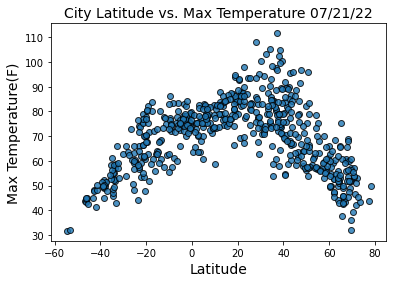

In [14]:
plt.scatter(lats, max_temps,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Max Temperature(F)', fontsize=14)
plt.title('City Latitude vs. Max Temperature ' + today, fontsize=14)

plt.show()

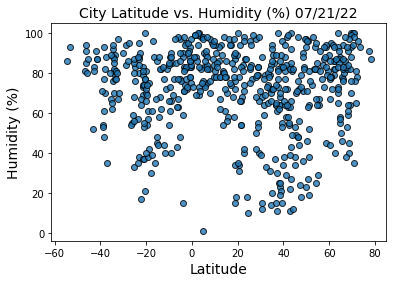

In [15]:
plt.scatter(lats, humidities,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Humidity (%)', fontsize=14)
plt.title('City Latitude vs. Humidity (%) ' + today, fontsize=14)

plt.show()

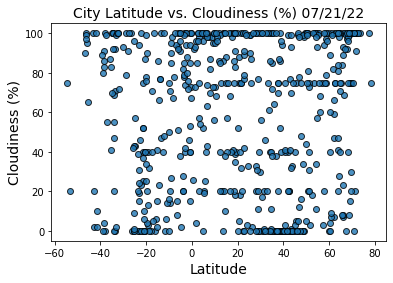

In [16]:
plt.scatter(lats, cloudiness,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Cloudiness (%)', fontsize=14)
plt.title('City Latitude vs. Cloudiness (%) ' + today, fontsize=14)

plt.show()

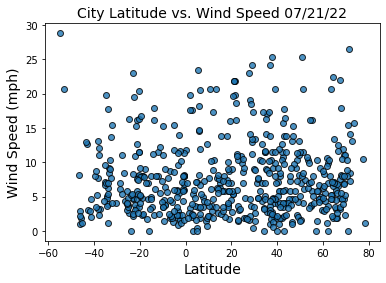

In [17]:
plt.scatter(lats, wind_speeds,
            edgecolors='black', linewidths=1, marker='o',
            alpha=0.8, label=cities)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Wind Speed (mph)', fontsize=14)
plt.title('City Latitude vs. Wind Speed ' + today, fontsize=14)

plt.show()

In [18]:
from scipy.stats import linregress

def plot_linear_regression(x_vals, y_vals, title, y_label, text_coordinates):
    # Run regression on hemisphere data
    (slope, intercept, r_val, p_val, std_err) = linregress(x_vals, y_vals)

    # Calculate regression line values
    regress_vals = x_vals * slope + intercept

    # Get regression equation
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot and plot regression line
    plt.scatter(x_vals, y_vals)
    plt.plot(x_vals, regress_vals, "r")

    # Annotate the text for the line equation
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title, fontsize=14)
    plt.xlabel('Latitude', fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    plt.show()

In [20]:
# Create hemisphere dataframes
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0,:]
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0,:]

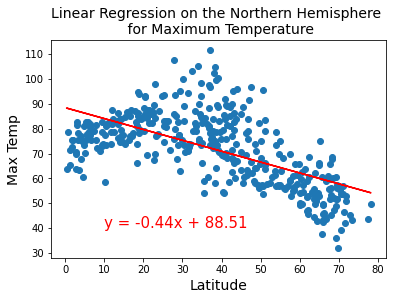

In [28]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'],
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (10,40))

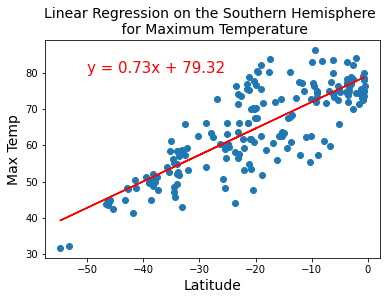

In [27]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'],
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature',
                       'Max Temp', (-50, 80))

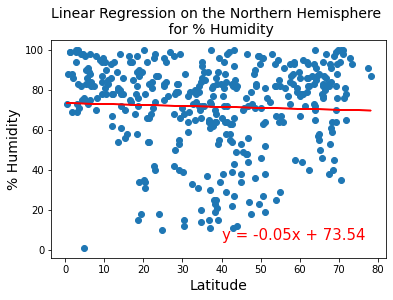

In [33]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'],
                       'Linear Regression on the Northern Hemisphere \n for % Humidity',
                       '% Humidity', (40, 5))

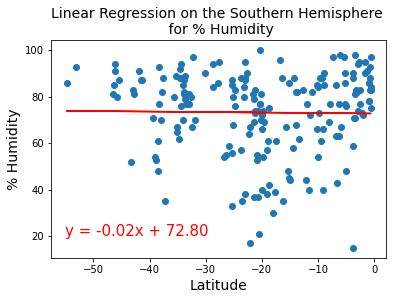

In [32]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'],
                       'Linear Regression on the Southern Hemisphere \n for % Humidity',
                       '% Humidity', (-55, 20))

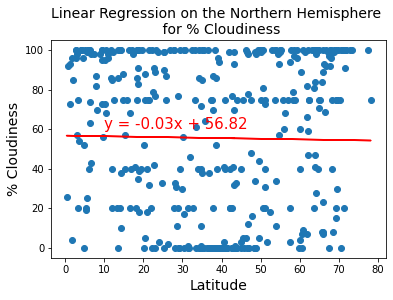

In [35]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'],
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness',
                       '% Cloudiness', (10, 60))

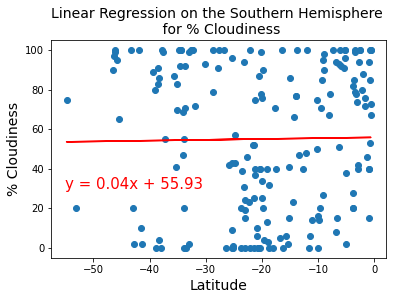

In [40]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'],
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness',
                       '% Cloudiness', (-55, 30))

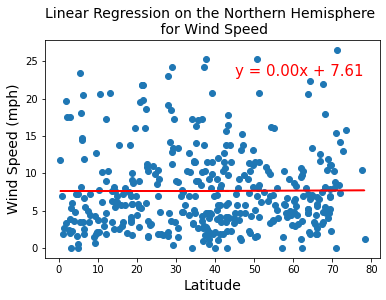

In [46]:
plot_linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'],
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)', (45, 23))

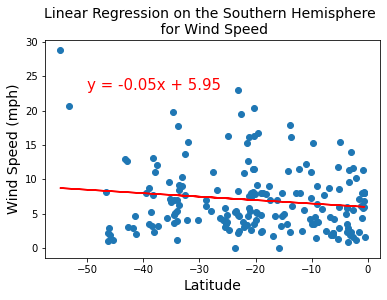

In [48]:
plot_linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'],
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed',
                       'Wind Speed (mph)', (-50, 23))